In [2]:
import turicreate as tc

In [3]:
data =  tc.SFrame('large data.csv')

Read 100 lines. Lines per second: 4576.66

Finished parsing file /root/notebooks/ML_GEO data/large data.csv

Parsing completed. Parsed 100 lines in 0.022723 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /root/notebooks/ML_GEO data/large data.csv

Parsing completed. Parsed 402 lines in 0.02941 secs.

In [4]:
data.head()

tissue,gender,age,strain
# of tissue = 36 tissue,gender (mouse),age of plants,b virus strain
4 months tissue,gender of human sera,age at biopsy,listeria strain
prostate tissue,gender of mice,age at diagnosis (y),paternal strain
# of tissue = 1 tissue,gender (rat),age (at diagnosis),siv strain
# of tissue = 40 tissue,gender (sex),sac age (wks),bxd strain
# of tissue = 42 tissue,gender of baby,age (1#pfu_1),donor strain
fetal vs adult tissue,gender,taqman pool by age,recipient strain
# of tissue = 38 tissue,gender and age,age at op,insect strain
a.thaliana tissue,gender of the clone,age of epilepsy duration(yr) ...,pathogen strain
age of ffpe tissue,gender (pup),age of rat,host strain


In [5]:
train_data, test_data = data.random_split(0.8) 

In [ ]:
model = tc.logistic_classifier.create(train_data, target = 'tissue', features = ['gender',
                                                                       'age',
                                                                       'strain',
                                                                       'cell type',
                                                                       'treatment',
                                                                       'cell line',
                                                                       'sex', 'disease',
                                                                       'genotype',
                                                                       'time'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Logistic regression:

--------------------------------------------------------

Number of examples          : 319

Number of classes           : 115

Number of feature columns   : 10

Number of unpacked features : 10

Number of coefficients      : 132354

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.003135  | 1.060314     | 0.996865          | 0.818182            |

| 2         | 5        | 1.000000  | 1.130332     | 0.996865          | 0.818182            |

| 3         | 6        | 1.000000  | 1.198033     | 0.996865          | 0.818182            |

| 4         | 7        | 1.000000  | 1.275691     | 0.996865          | 0.818182            |

| 5         | 8        | 1.000000  | 1.332287     | 1.000000          | 0.818182            |

| 6         | 9        | 1.000000  | 1.393122     | 0.003135          | 0.000000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [1]:
model

NameError: name 'model' is not defined

In [7]:
# Make predictions and evaluate results.
ev_train = model.evaluate(train_data)

In [8]:
ev_train

{'accuracy': 0.9845857418111753,
 'auc': 0.9985909822866346,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 3
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      no      |        no       |  828  |
 |     age      |       age       |  194  |
 |     age      |        no       |   16  |
 +--------------+-----------------+-------+
 [3 rows x 3 columns],
 'f1_score': 0.9904306220095694,
 'log_loss': 0.03296346072970774,
 'precision': 0.981042654028436,
 'recall': 1.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+-----+
 | threshold | fpr | tpr |  p  |  n  |
 +-----------+-----+-----+-----+-----+
 |    0.0    | 1.0 | 1.0 | 828 | 210 |
 |   1e-05   | 1.0 | 1.0 | 828 | 210 |
 |   2e-05   | 1.0 | 1.0 | 828 | 210 |
 |   3e-05   | 1.0 | 1.0 | 828 | 210 |
 |   4e-05

In [9]:
ev_test = model.evaluate(test_data)

In [10]:
ev_test

{'accuracy': 0.8015267175572519,
 'auc': 0.5020908837468637,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 3
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      no      |        no       |  210  |
 |      no      |       age       |   1   |
 |     age      |        no       |   51  |
 +--------------+-----------------+-------+
 [3 rows x 3 columns],
 'f1_score': 0.8898305084745762,
 'log_loss': 0.5585371946345745,
 'precision': 0.8045977011494253,
 'recall': 0.995260663507109,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+----+
 | threshold | fpr | tpr |  p  | n  |
 +-----------+-----+-----+-----+----+
 |    0.0    | 1.0 | 1.0 | 211 | 51 |
 |   1e-05   | 1.0 | 1.0 | 211 | 51 |
 |   2e-05   | 1.0 | 1.0 | 211 | 51 |
 |   3e-05   | 1.0 | 1.0 | 211 | 51 |
 | 

In [11]:
ev_test.items()

[('f1_score', 0.8898305084745762),
 ('auc', 0.5020908837468637),
 ('recall', 0.995260663507109),
 ('precision', 0.8045977011494253),
 ('log_loss', 0.5585371946345745),
 ('roc_curve', Columns:
  	threshold	float
  	fpr	float
  	tpr	float
  	p	int
  	n	int
  
  Rows: 100001
  
  Data:
  +-----------+-----+-----+-----+----+
  | threshold | fpr | tpr |  p  | n  |
  +-----------+-----+-----+-----+----+
  |    0.0    | 1.0 | 1.0 | 211 | 51 |
  |   1e-05   | 1.0 | 1.0 | 211 | 51 |
  |   2e-05   | 1.0 | 1.0 | 211 | 51 |
  |   3e-05   | 1.0 | 1.0 | 211 | 51 |
  |   4e-05   | 1.0 | 1.0 | 211 | 51 |
  |   5e-05   | 1.0 | 1.0 | 211 | 51 |
  |   6e-05   | 1.0 | 1.0 | 211 | 51 |
  |   7e-05   | 1.0 | 1.0 | 211 | 51 |
  |   8e-05   | 1.0 | 1.0 | 211 | 51 |
  |   9e-05   | 1.0 | 1.0 | 211 | 51 |
  +-----------+-----+-----+-----+----+
  [100001 rows x 5 columns]
  Note: Only the head of the SFrame is printed.
  You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.),
 ('confu

In [12]:
model.predict(test_data)

dtype: str
Rows: 262
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', ... ]

In [13]:
test_data.print_rows(68,2)

+-------------------------------+-----+
|              key              | cat |
+-------------------------------+-----+
|           age at mi           | age |
|             agebin            | age |
|         ageatdraw yrs         | age |
|     age at sacrifice days     | age |
|    age at diagnosis (years)   | age |
|           age 2pfc 2          | age |
|         age of patient        | age |
|          age at death         | age |
|           age (day)           | age |
|  ageaccelerationdsvscontrols  | age |
|         age of embryo         | age |
|         age of forest         | age |
|           age 3pfc 3          | age |
|    age in days at diagnosis   | age |
|          age of donor         | age |
|           age instar          | age |
|       age-at-examination      | age |
|        age of ipi yr/mo       | age |
| age of fly in days post ec... | age |
|   age hours after egg laying  | age |
|             age y             | age |
|             age tx            | age |


In [14]:
#ev_test.items()
ev_test['auc']

0.5020908837468637

In [15]:
roc_curve_table = ev_test['roc_curve']

In [16]:
roc_curve_table

threshold,fpr,tpr,p,n
0.0,1.0,1.0,211,51
1e-05,1.0,1.0,211,51
2e-05,1.0,1.0,211,51
3e-05,1.0,1.0,211,51
4e-05,1.0,1.0,211,51
5e-05,1.0,1.0,211,51
6e-05,1.0,1.0,211,51
7e-05,1.0,1.0,211,51
8e-05,1.0,1.0,211,51
9e-05,1.0,1.0,211,51


In [17]:
import matplotlib.pyplot as plt

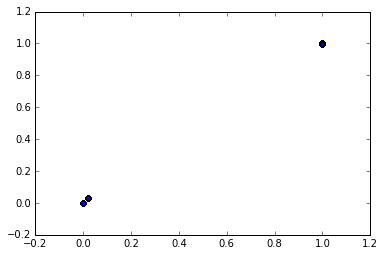

In [18]:
plt.scatter(roc_curve_table['fpr'], roc_curve_table['tpr'])

In [19]:
predictions = model.classify(data)
#predictions1 = model1.classify(test_data)

In [20]:
#predictions.export_csv('test_pred_all_log_reg.csv')

In [21]:
ev_train['auc']

0.9985909822866346

In [22]:
roc_curve_train = ev_train['roc_curve']

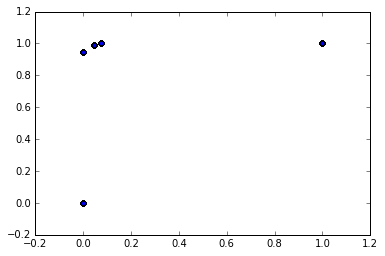

In [23]:
plt.scatter(roc_curve_train['fpr'],roc_curve_train['tpr'])